In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

##Let's begin

In [2]:
df=pd.read_csv('../data/delhi-weather-aqi-2025.csv')
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2
0,01/01/2025,0:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7
1,01/01/2025,1:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8
2,01/01/2025,2:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6
3,01/01/2025,3:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7
4,01/01/2025,4:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6


In [3]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'lat', 'lon', 'temp_c', 'humidity',
       'pressure_mb', 'windspeed_kph', 'condition_text', 'description',
       'aqi_index', 'pm2_5', 'pm10', 'co', 'no2'],
      dtype='object')

In [4]:
df.shape

(52560, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+ MB


In [8]:
df.describe()

,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,aqi_index,pm2_5,pm10,co,no2
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,28.608850,77.174567,25.024406,62.285940,983.162635,6.565820,287.364212,89.542432,300.462700,863.844273,35.442757
std,0.058927,0.096519,7.618231,23.454666,6.688582,3.478066,327.979524,55.363812,412.782899,600.845140,28.978905
min,28.527300,77.049400,5.700000,5.000000,966.100000,0.000000,56.000000,6.000000,6.100000,146.000000,1.700000
25%,28.556200,77.100000,19.500000,44.000000,977.500000,4.000000,152.000000,51.100000,80.600000,464.000000,14.900000
50%,28.609300,77.160100,26.500000,65.000000,983.400000,6.000000,170.000000,76.400000,151.800000,664.000000,26.900000
75%,28.646900,77.261800,30.500000,82.000000,988.900000,8.700000,238.000000,110.400000,325.000000,1078.000000,47.100000
max,28.704100,77.316000,43.800000,100.000000,998.800000,27.100000,2742.000000,443.300000,3263.400000,7432.000000,220.100000


In [9]:
df.isnull().sum()

date_ist          0
time_ist          0
location          0
lat               0
lon               0
temp_c            0
humidity          0
pressure_mb       0
windspeed_kph     0
condition_text    0
description       0
aqi_index         0
pm2_5             0
pm10              0
co                0
no2               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'lat', 'lon', 'temp_c', 'humidity',
       'pressure_mb', 'windspeed_kph', 'condition_text', 'description',
       'aqi_index', 'pm2_5', 'pm10', 'co', 'no2'],
      dtype='object')

In [12]:
df['date_ist']=pd.to_datetime(df['date_ist'],format='%d/%m/%Y')

In [13]:
df['year_rec']=df['date_ist'].dt.year
df['mon_rec']=df['date_ist'].dt.month
df['day_rec']=df['date_ist'].dt.day

In [14]:
df['year_rec'].value_counts()

year_rec
2025    52560
Name: count, dtype: int64

In [15]:
df['mon_rec'].value_counts()

mon_rec
1     4464
3     4464
5     4464
7     4464
8     4464
10    4464
12    4464
4     4320
6     4320
9     4320
11    4320
2     4032
Name: count, dtype: int64

In [16]:
df['day_rec'].value_counts()

day_rec
1     1728
2     1728
28    1728
27    1728
26    1728
25    1728
24    1728
23    1728
22    1728
21    1728
20    1728
19    1728
18    1728
17    1728
16    1728
15    1728
14    1728
13    1728
12    1728
11    1728
10    1728
9     1728
8     1728
7     1728
6     1728
5     1728
4     1728
3     1728
29    1584
30    1584
31    1008
Name: count, dtype: int64

In [17]:
df['hour'] = pd.to_datetime(df['time_ist'], format='%H:%M').dt.hour

In [18]:
df['hour'].value_counts()

hour
0     2190
1     2190
22    2190
21    2190
20    2190
19    2190
18    2190
17    2190
16    2190
15    2190
14    2190
13    2190
12    2190
11    2190
10    2190
9     2190
8     2190
7     2190
6     2190
5     2190
4     2190
3     2190
2     2190
23    2190
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_ist        52560 non-null  datetime64[ns]
 1   time_ist        52560 non-null  object        
 2   location        52560 non-null  object        
 3   lat             52560 non-null  float64       
 4   lon             52560 non-null  float64       
 5   temp_c          52560 non-null  float64       
 6   humidity        52560 non-null  int64         
 7   pressure_mb     52560 non-null  float64       
 8   windspeed_kph   52560 non-null  float64       
 9   condition_text  52560 non-null  object        
 10  description     52560 non-null  object        
 11  aqi_index       52560 non-null  int64         
 12  pm2_5           52560 non-null  float64       
 13  pm10            52560 non-null  float64       
 14  co              52560 non-null  int64         
 15  no

In [20]:
df['location'].value_counts()

location
Anand Vihar        8760
Connaught Place    8760
Dwarka             8760
Okhla Phase III    8760
Rohini             8760
IGI Airport        8760
Name: count, dtype: int64

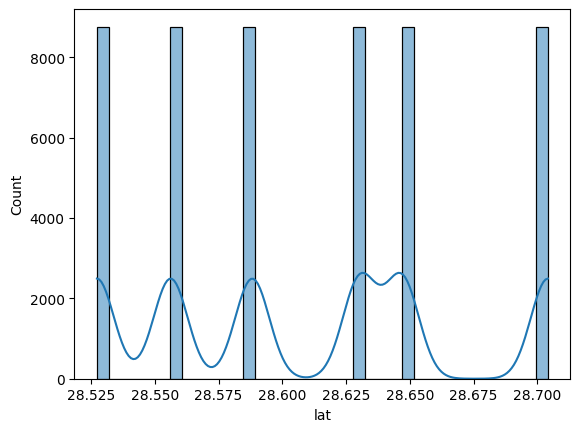

In [21]:
sns.histplot(df['lat'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

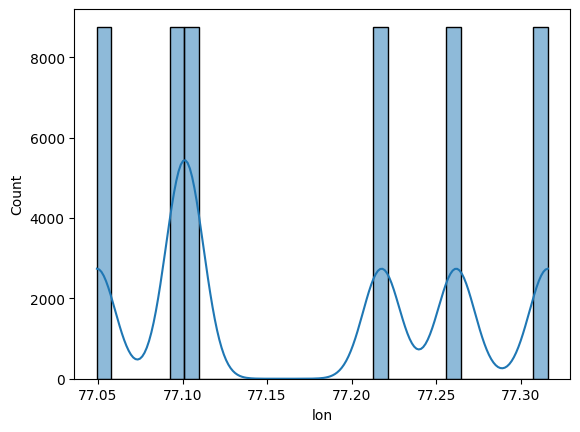

In [22]:
sns.histplot(df['lon'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

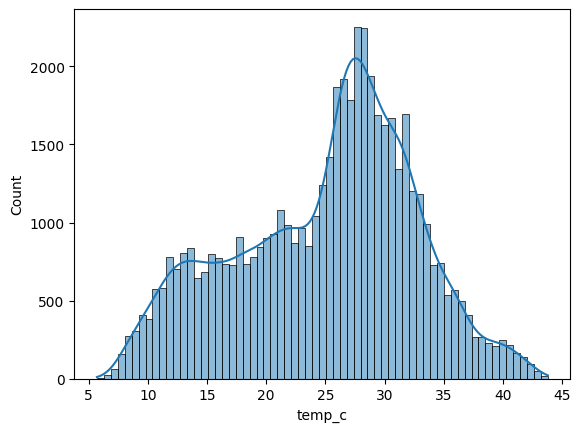

In [23]:
sns.histplot(df['temp_c'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

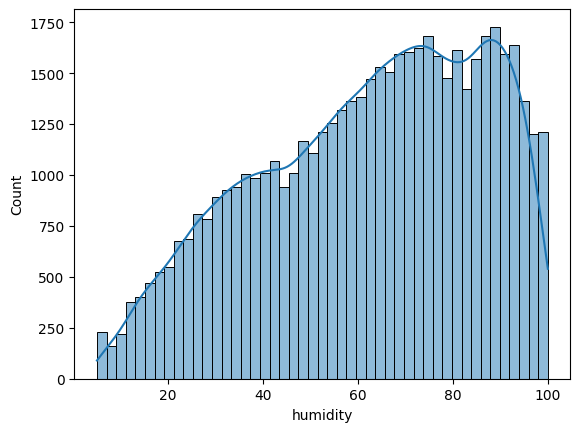

In [24]:
sns.histplot(df['humidity'],kde=True)
plt.show()

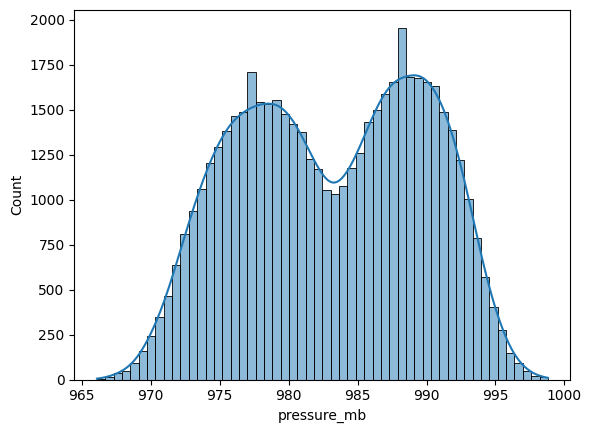

In [25]:
sns.histplot(df['pressure_mb'],kde=True)
plt.show()

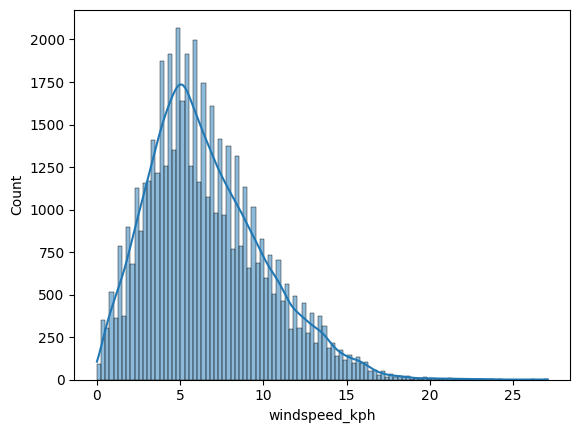

In [26]:
sns.histplot(df['windspeed_kph'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [27]:
df['condition_text'].value_counts()

condition_text
Clear sky            30086
Overcast             10285
Mainly clear          4444
Drizzle: Light        3090
Partly cloudy         2557
Drizzle: Moderate      643
Rain: Moderate         421
Rain: Slight           416
Fog                    334
Drizzle: Dense         221
Rain: Heavy             63
Name: count, dtype: int64

In [28]:
df['description'].value_counts()

description
WMO Code 0     30086
WMO Code 3     10285
WMO Code 1      4444
WMO Code 51     3090
WMO Code 2      2557
WMO Code 53      643
WMO Code 63      421
WMO Code 61      416
WMO Code 45      334
WMO Code 55      221
WMO Code 65       63
Name: count, dtype: int64

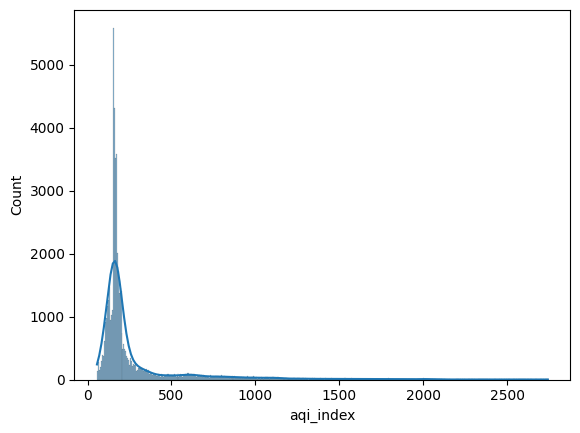

In [29]:
sns.histplot(df['aqi_index'],kde=True)
plt.show()

In [30]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'lat', 'lon', 'temp_c', 'humidity',
       'pressure_mb', 'windspeed_kph', 'condition_text', 'description',
       'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'year_rec', 'mon_rec',
       'day_rec', 'hour'],
      dtype='object')

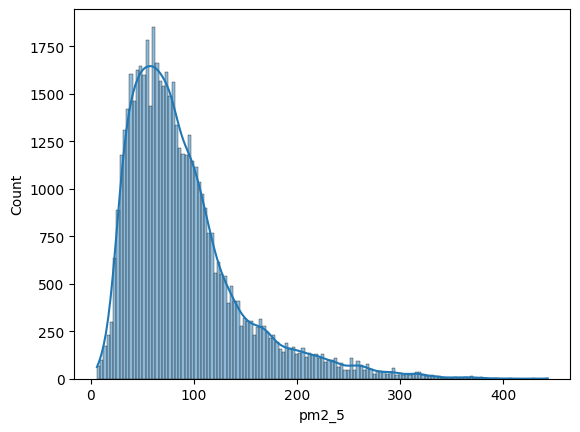

In [31]:
sns.histplot(df['pm2_5'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

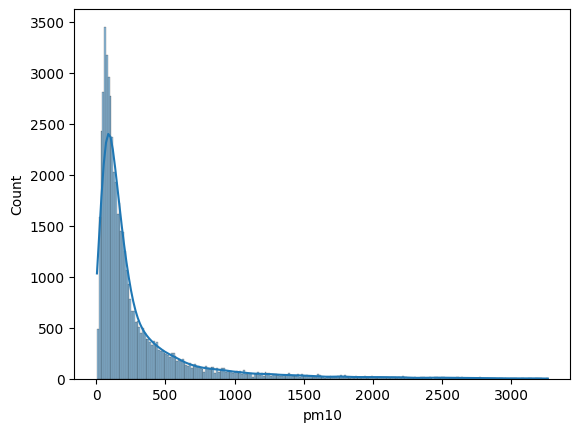

In [32]:
sns.histplot(df['pm10'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

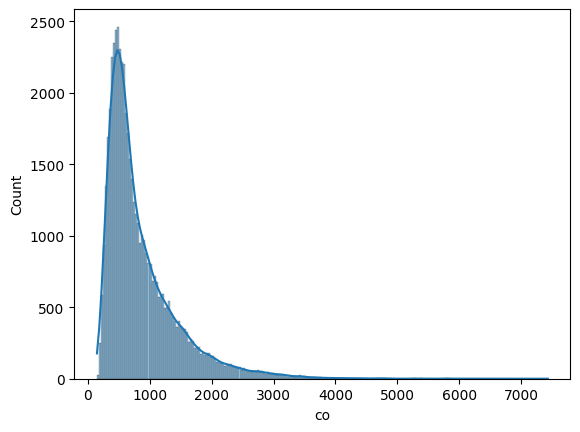

In [33]:
sns.histplot(df['co'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

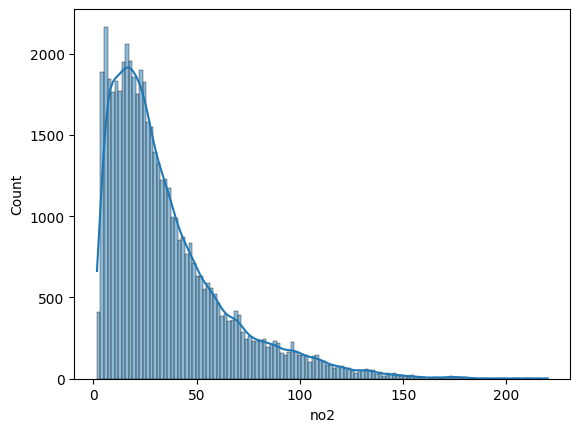

In [34]:
sns.histplot(df['no2'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [35]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'lat', 'lon', 'temp_c', 'humidity',
       'pressure_mb', 'windspeed_kph', 'condition_text', 'description',
       'aqi_index', 'pm2_5', 'pm10', 'co', 'no2', 'year_rec', 'mon_rec',
       'day_rec', 'hour'],
      dtype='object')

In [36]:
df.drop(columns=["lat", "lon"], inplace=True)

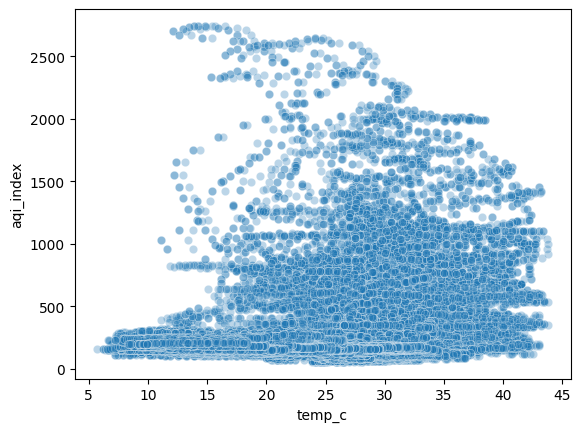

In [37]:
sns.scatterplot(x='temp_c',y='aqi_index',data=df,alpha=.3)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [38]:
df['temp_category']=pd.cut(df['temp_c'],bins=[0, 10, 20, 30, 40, 50],
    labels=["Cold", "Cool", "Moderate", "Hot", "Extreme"])
df.head()

,date_ist,time_ist,location,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2,year_rec,mon_rec,day_rec,hour,temp_category
0,2025-01-01,0:00,Anand Vihar,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7,2025,1,1,0,Cold
1,2025-01-01,1:00,Anand Vihar,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8,2025,1,1,1,Cold
2,2025-01-01,2:00,Anand Vihar,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6,2025,1,1,2,Cold
3,2025-01-01,3:00,Anand Vihar,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7,2025,1,1,3,Cold
4,2025-01-01,4:00,Anand Vihar,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6,2025,1,1,4,Cold


In [39]:
df.groupby("temp_category")["aqi_index"].mean()

/var/folders/pq/j745wk6x5fzc3ssfrw2vvqkh0000gn/T/ipykernel_1123/2082689300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("temp_category")["aqi_index"].mean()


temp_category
Cold        192.682980
Cool        225.616272
Moderate    272.759615
Hot         363.354539
Extreme     621.949669
Name: aqi_index, dtype: float64

In [40]:
##Test whether AQI differs significantly across temperature categories

#Step 1: Define Hypotheses
#Null Hypothesis (H₀)
#Mean AQI is the same across all temperature categories
#Alternative Hypothesis (H₁)
#At least one temperature category has a significantly different mean AQI

#Step 3: One-Way ANOVA Test
#ANOVA is appropriate because:
#Dependent variable: AQI (continuous)
#Independent variable: Temperature category (categorical, >2 groups)

In [41]:
from scipy.stats import f_oneway

groups = [
    df[df["temp_category"] == cat]["aqi_index"].dropna()
    for cat in df["temp_category"].unique()
]

f_stat, p_value = f_oneway(*groups)

f_stat, p_value

(np.float64(550.6559048585688), np.float64(0.0))

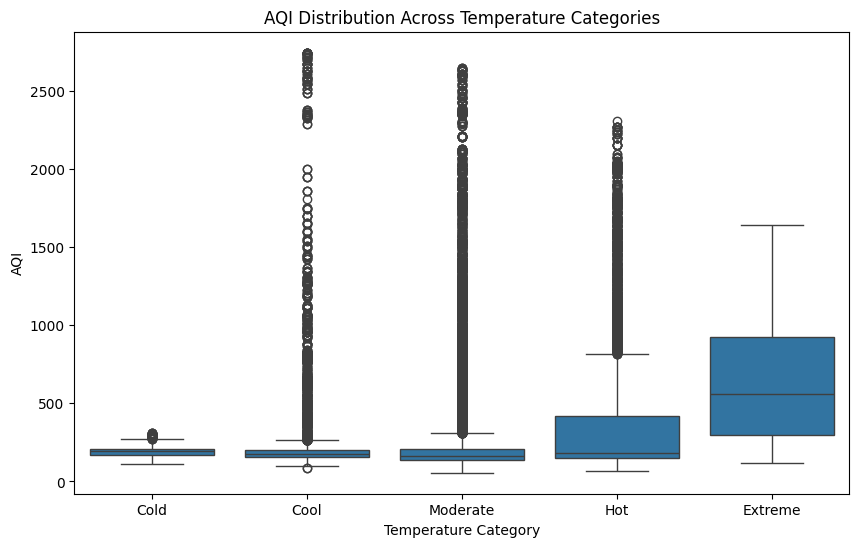

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="temp_category", y="aqi_index", data=df)
plt.title("AQI Distribution Across Temperature Categories")
plt.xlabel("Temperature Category")
plt.ylabel("AQI")
plt.show()

In [43]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'temp_c', 'humidity', 'pressure_mb',
       'windspeed_kph', 'condition_text', 'description', 'aqi_index', 'pm2_5',
       'pm10', 'co', 'no2', 'year_rec', 'mon_rec', 'day_rec', 'hour',
       'temp_category'],
      dtype='object')

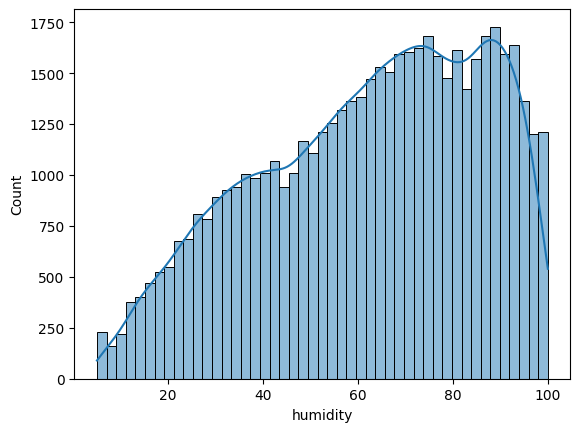

In [44]:
sns.histplot(df['humidity'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [45]:
df['humidity_bin']=pd.qcut(df['humidity'],q=5,duplicates='drop')
df.groupby('humidity_bin')['aqi_index'].mean()

/var/folders/pq/j745wk6x5fzc3ssfrw2vvqkh0000gn/T/ipykernel_1123/310711611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('humidity_bin')['aqi_index'].mean()


humidity_bin
(4.999, 39.0]    467.762277
(39.0, 58.0]     332.879622
(58.0, 72.0]     252.139716
(72.0, 85.0]     203.449828
(85.0, 100.0]    173.734396
Name: aqi_index, dtype: float64

In [46]:
groups = [
    df[df["humidity_bin"] == cat]["aqi_index"].dropna()
    for cat in df["humidity_bin"].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(1523.5812234493528), np.float64(0.0))

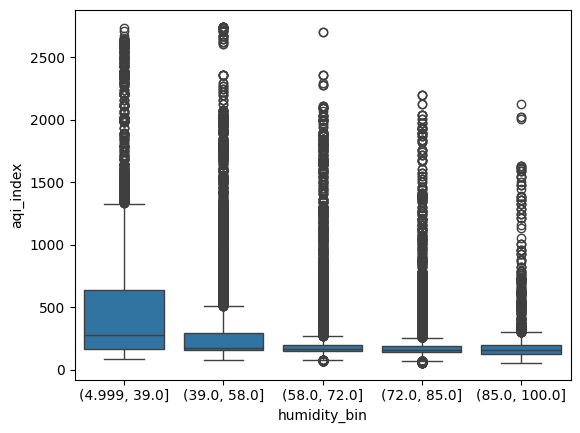

In [47]:
sns.boxplot(x='humidity_bin',y='aqi_index',data=df)
plt.show()

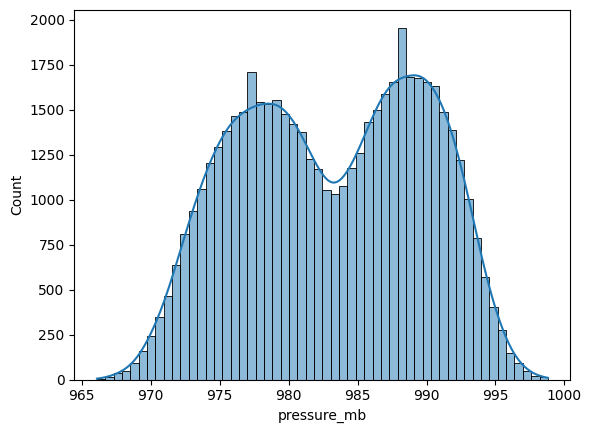

In [48]:
sns.histplot(df['pressure_mb'],kde=True)
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
df['pressure_bin']=pd.qcut(df['pressure_mb'],q=5,duplicates='drop')
df['pressure_bin'].value_counts()

pressure_bin
(966.099, 976.5]    10688
(980.7, 986.0]      10562
(976.5, 980.7]      10493
(989.8, 998.8]      10448
(986.0, 989.8]      10369
Name: count, dtype: int64

In [50]:
groups = [
    df[df["pressure_bin"] == cat]["aqi_index"].dropna()
    for cat in df["pressure_bin"].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(452.1799423687625), np.float64(0.0))

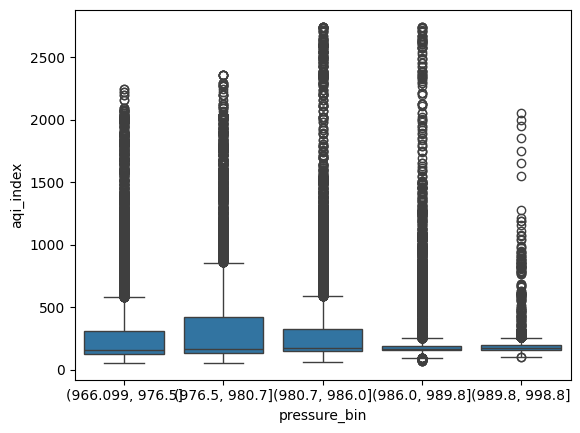

In [51]:
sns.boxplot(x='pressure_bin',y='aqi_index',data=df)
plt.show()

In [52]:
from scipy.stats import kruskal


In [53]:
k_stat,p_val=kruskal(*groups)
p_val

np.float64(2.119070014726313e-122)

In [54]:
df['wind_bin']=pd.qcut(df['windspeed_kph'],q=5,duplicates='drop')
df['wind_bin'].value_counts()

wind_bin
(-0.001, 3.6]    10839
(6.9, 9.4]       10659
(3.6, 5.2]       10562
(9.4, 27.1]      10284
(5.2, 6.9]       10216
Name: count, dtype: int64

In [55]:
groups = [
    df[df['wind_bin'] == cat]["aqi_index"].dropna()
    for cat in df['wind_bin'].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(707.9108126938074), np.float64(0.0))

In [56]:
f_stat, p_anova = f_oneway(*groups)
f_stat, p_anova

(np.float64(707.9108126938074), np.float64(0.0))

In [57]:
eta_squared = f_stat * (len(groups) - 1) / (
    f_stat * (len(groups) - 1) + (len(df) - len(groups))
)

eta_squared

np.float64(0.05112502012361249)

In [58]:
df.columns

Index(['date_ist', 'time_ist', 'location', 'temp_c', 'humidity', 'pressure_mb',
       'windspeed_kph', 'condition_text', 'description', 'aqi_index', 'pm2_5',
       'pm10', 'co', 'no2', 'year_rec', 'mon_rec', 'day_rec', 'hour',
       'temp_category', 'humidity_bin', 'pressure_bin', 'wind_bin'],
      dtype='object')

In [59]:
df['pm2_5_bin']=pd.qcut(df['pm2_5'],q=5,duplicates='drop')
df['pm2_5_bin'].value_counts()

pm2_5_bin
(5.999, 46.0]     10569
(88.2, 121.5]     10557
(46.0, 65.9]      10500
(65.9, 88.2]      10482
(121.5, 443.3]    10452
Name: count, dtype: int64

In [60]:
groups = [
    df[df['pm2_5_bin'] == cat]["aqi_index"].dropna()
    for cat in df['pm2_5_bin'].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(3516.4563570728246), np.float64(0.0))

In [61]:
df['pm10_bin']=pd.qcut(df['pm10'],q=5,duplicates='drop')
df['pm10_bin'].value_counts()

pm10_bin
(6.098999999999999, 70.5]    10569
(117.1, 194.6]               10533
(408.9, 3263.4]              10500
(194.6, 408.9]               10497
(70.5, 117.1]                10461
Name: count, dtype: int64

In [62]:
groups = [
    df[df['pm10_bin'] == cat]["aqi_index"].dropna()
    for cat in df['pm10_bin'].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(10194.787757746257), np.float64(0.0))

In [63]:
df['co_bin']=pd.qcut(df['co'],q=5,duplicates='drop')
df['co_bin'].value_counts()

co_bin
(429.0, 575.0]      10569
(145.999, 429.0]    10526
(791.0, 1217.0]     10497
(1217.0, 7432.0]    10496
(575.0, 791.0]      10472
Name: count, dtype: int64

In [64]:
groups = [
    df[df['co_bin'] == cat]["aqi_index"].dropna()
    for cat in df['co_bin'].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(510.3493865818046), np.float64(0.0))

In [65]:
df['no2_bin']=pd.qcut(df['no2'],q=5,duplicates='drop')
df['no2_bin'].value_counts()

no2_bin
(21.96, 33.5]    10563
(1.699, 12.5]    10560
(53.8, 220.1]    10497
(33.5, 53.8]     10476
(12.5, 21.96]    10464
Name: count, dtype: int64

In [66]:
groups = [
    df[df['no2_bin'] == cat]["aqi_index"].dropna()
    for cat in df['no2_bin'].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(542.6014283471379), np.float64(0.0))

<Axes: xlabel='aqi_index', ylabel='Count'>

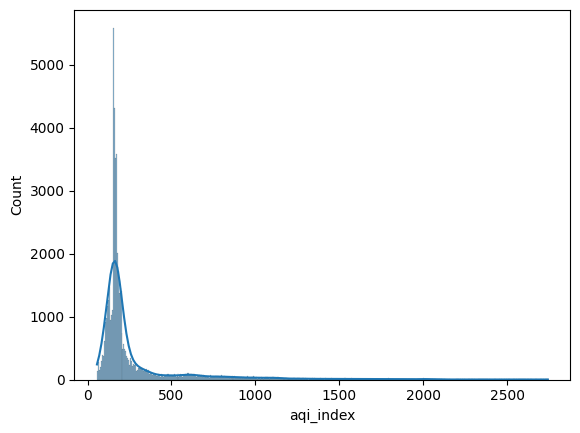

In [67]:
sns.histplot(df['aqi_index'],kde=True)

In [68]:
bins=[0,50,100,150,200,300,500]
labels=["Good", "Moderate", "Unhealthy_Sensitive",
          "Unhealthy", "Very_Unhealthy", "Hazardous"]
df['aqi_category']=pd.cut(df['aqi_index'],bins=bins,labels=labels)

In [69]:
df['aqi_category'].value_counts()

aqi_category
Unhealthy              23883
Unhealthy_Sensitive     9780
Very_Unhealthy          6213
Hazardous               3558
Moderate                2223
Good                       0
Name: count, dtype: int64

In [74]:
top_conditions=df["condition_text"].value_counts().head(6).index
top_conditions

Index(['Clear sky', 'Overcast', 'Mainly clear', 'Drizzle: Light',
       'Partly cloudy', 'Drizzle: Moderate'],
      dtype='object', name='condition_text')

In [75]:
df_cond = df[df["condition_text"].isin(top_conditions)]

In [77]:
df_cond.head()

,date_ist,time_ist,location,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2,year_rec,mon_rec,day_rec,hour,temp_category,humidity_bin,pressure_bin,wind_bin,pm2_5_bin,pm10_bin,co_bin,no2_bin,aqi_category
0,2025-01-01,0:00,Anand Vihar,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7,2025,1,1,0,Cold,"(85.0, 100.0]","(989.8, 998.8]","(-0.001, 3.6]","(121.5, 443.3]","(117.1, 194.6]","(1217.0, 7432.0]","(53.8, 220.1]",Unhealthy
1,2025-01-01,1:00,Anand Vihar,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8,2025,1,1,1,Cold,"(85.0, 100.0]","(989.8, 998.8]","(-0.001, 3.6]","(121.5, 443.3]","(117.1, 194.6]","(1217.0, 7432.0]","(33.5, 53.8]",Unhealthy
2,2025-01-01,2:00,Anand Vihar,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6,2025,1,1,2,Cold,"(85.0, 100.0]","(989.8, 998.8]","(3.6, 5.2]","(121.5, 443.3]","(117.1, 194.6]","(1217.0, 7432.0]","(33.5, 53.8]",Unhealthy
3,2025-01-01,3:00,Anand Vihar,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7,2025,1,1,3,Cold,"(85.0, 100.0]","(989.8, 998.8]","(5.2, 6.9]","(121.5, 443.3]","(117.1, 194.6]","(1217.0, 7432.0]","(21.96, 33.5]",Unhealthy
4,2025-01-01,4:00,Anand Vihar,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6,2025,1,1,4,Cold,"(85.0, 100.0]","(989.8, 998.8]","(5.2, 6.9]","(121.5, 443.3]","(117.1, 194.6]","(1217.0, 7432.0]","(12.5, 21.96]",Unhealthy


In [78]:
contingency = pd.crosstab(
    df_cond["condition_text"],
    df_cond["aqi_category"]
)

contingency

aqi_category,Moderate,Unhealthy_Sensitive,Unhealthy,Very_Unhealthy,Hazardous
condition_text,,,,,
Clear sky,236,4356,14993,3363,2342
Drizzle: Light,699,1136,860,189,81
Drizzle: Moderate,174,166,220,33,15
Mainly clear,136,970,1839,581,320
Overcast,610,2227,4614,1351,571
Partly cloudy,83,549,980,406,179


In [79]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency)

chi2, p_value

(np.float64(5818.086244305669), np.float64(0.0))

In [80]:
n = contingency.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

cramers_v

np.float64(0.18124297389066854)

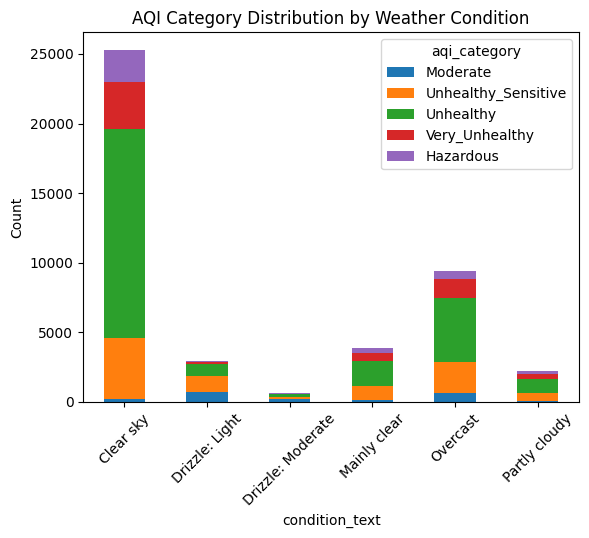

In [81]:
contingency.plot(kind="bar", stacked=True)
plt.title("AQI Category Distribution by Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [83]:
top_description=df['description'].value_counts().head(6).index
df_desc=df[df['description'].isin(top_description)]

In [84]:
contigency=pd.crosstab(df_desc["description"],
    df_desc["aqi_category"])

In [85]:
contigency

aqi_category,Moderate,Unhealthy_Sensitive,Unhealthy,Very_Unhealthy,Hazardous
description,,,,,
WMO Code 0,236,4356,14993,3363,2342
WMO Code 1,136,970,1839,581,320
WMO Code 2,83,549,980,406,179
WMO Code 3,610,2227,4614,1351,571
WMO Code 51,699,1136,860,189,81
WMO Code 53,174,166,220,33,15


In [87]:
chi2,p_val,dof,expected=chi2_contingency(contigency)
chi2,p_value

(np.float64(5818.08624430567), np.float64(0.0))

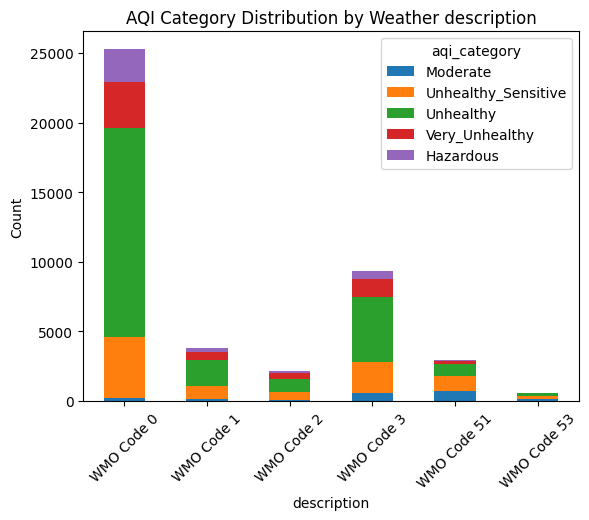

In [89]:
contigency.plot(kind="bar", stacked=True)
plt.title("AQI Category Distribution by Weather description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [90]:
features = [
    "temp_c",
    "humidity",
    "pressure_mb",
    "windspeed_kph",
    "pm2_5",
    "pm10",
    "co",
    "no2"
]

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
X=df[features]
y=df['aqi_index']

In [96]:
X.head()

,temp_c,humidity,pressure_mb,windspeed_kph,pm2_5,pm10,co,no2
0,8.1,100,995.4,2.9,185.8,188.6,1907,56.7
1,7.7,100,994.7,3.2,174.6,177.4,1669,44.8
2,7.5,100,994.3,4.5,164.4,166.7,1493,34.6
3,7.8,99,994.1,6.0,156.5,158.8,1401,26.7
4,7.3,100,993.8,6.8,149.5,151.8,1372,20.6


In [97]:
y.head()

0    197
1    198
2    199
3    200
4    200
Name: aqi_index, dtype: int64

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [101]:
y_pred

array([189.07856213, 411.60219061, 174.94334379, ..., 325.35993172,
       178.07251878, 128.36599236], shape=(10512,))

In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

In [103]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 93.22106466609453
R²: 0.7027159824097284


In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

MAE: 49.28271601501374
R²: 0.886614840743065


In [106]:
importance_df = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df

,feature,importance
5,pm10,0.746287
4,pm2_5,0.053251
0,temp_c,0.044386
1,humidity,0.040474
7,no2,0.036621
6,co,0.028600
3,windspeed_kph,0.026219
2,pressure_mb,0.024162


In [107]:
df[["pm2_5", "pm10"]].corr(method="spearman")

,pm2_5,pm10
pm2_5,1.000000,0.666418
pm10,0.666418,1.000000
